In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


In [20]:
#load the watermelon dataset

def get_watermelon_dataset():
    file = open('/Users/HansZeng/Desktop/watermelon-dataset.txt')
    lines = file.readlines()
    m = []
    i = 0
    for line in lines:
        m.append(line.split(","))
        i = i + 1
    df = pd.DataFrame(m[1:])
    l1 = ['是']*8
    l2 = ['否']*9
    l1.extend(l2)
    df[9] = l1
    df.columns = ['编号','色泽','根蒂','敲声','纹理','脐部','触感','密度','含糖率','好瓜']
    return df

df = get_watermelon_dataset()
df

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.46,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


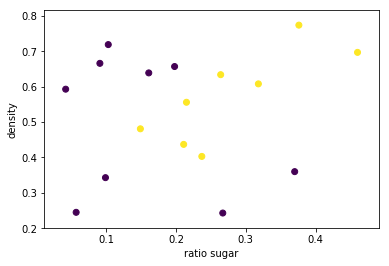

In [115]:
"""preprocess the dataset """

#从原始数据集中抽取新的数据集，新的数据集只包含“密度”和“含糖量”的数据
s1 = df['密度']
s2 = df['含糖率']
s3 = [1]*8
s3.extend([0]*9)
df = pd.DataFrame({'label':s3,'密度':s1,'含糖率':s2})

#convert the dataframe to matrix
m = df.values

#convert the string in matrix to float
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        m[i,j] = float(m[i,j])

#draw scatter diagram to plot raw data
xdim = m[:,1]
ydim = m[:,2]
plt.scatter(xdim, ydim, c=m[:,0])
plt.xlabel("ratio sugar")
plt.ylabel("density")

In [116]:
"""use the sklearn libaray to complete logistic regression homework"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import classification_report
from sklearn import model_selection


#make the y_label encoder
lab_enc = preprocessing.LabelEncoder()
y_label = lab_enc.fit_transform(m[:,0])
#select the train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(m[:,1:3], y_label,test_size=0.5, random_state=42)
#train the X_train
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#get the summarize of fitting report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.20      0.33         5
          1       0.50      1.00      0.67         4

avg / total       0.78      0.56      0.48         9



可以看出上面的分类情况不是很好，如何改进？

下面自己编程得到梯度下降算法

In [149]:

import numpy as np
import math
def likehood_func(X, y, beta):     #the goal function to get the minimal value as the (3.27) equation in zzh's book
    """
    @para X: X is the sample matrix, the dim is (3,17)
    @para y: y is the label array
    @return beta: the  parameter of (3.27) in zzh's book
    """
    r, c = X.shape
    sum = 0
    for i in range(r):
        exp = -y[i]*np.dot(beta, X[i,]) + math.log(1+math.e**(np.dot(X[i,],beta)))
        sum = sum + exp
    return sum


In [272]:
def gradient_descent(X, y,h):
    """
    @para X: X is the sample matrix, the dim is (3,17)
    @para y: y is the label array
    @para h: h is the step length of iteration
    @return beta: the best parameter of (3.27) in zzh's book
    """
    maxtime = 500    #give the iterative time limit
    r, c = X.shape
    delta_beta = np.array([h]*c)
    beta = np.zeros(c)
    cur_lh = 0    #the initial function value and set it 0
    lhs = []    #记录似然函数在不同beta下的值
    
    for i in range(maxtime):
        temp_beta = beta
        #patrial part
        for j in range(c):
            beta[j] += delta_beta[j]
            new_lh = likehood_func(X, y, beta)
            delta_beta[j] = -h * (new_lh - cur_lh) / delta_beta[j]
            beta = temp_beta
        beta += delta_beta
        cur_lh = likehood_func(X, y, beta)
        lhs.append(cur_lh)
    return (beta,lhs)

In [290]:
X = m[:,0:3]
y = m[:,0]


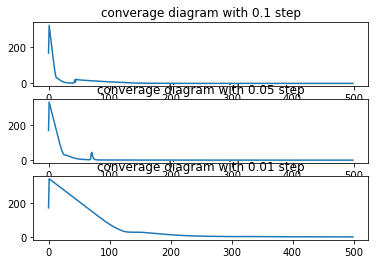

In [242]:
"""draw line diagram to view the converage condition"""
x = range(500)
plt.subplot(3,1,1)
plt.plot(range(500),gradient_descent(X,y,0.1)[1])
plt.title("converage diagram with 0.1 step")

plt.subplot(3,1,2)
plt.plot(range(500),gradient_descent(X,y,0.05)[1])
plt.title("converage diagram with 0.05 step")

plt.subplot(3,1,3)
plt.plot(range(500),gradient_descent(X,y,0.01)[1])
plt.title("converage diagram with 0.01 step")

plt.show()

In [270]:
def gradient_descent_version2(X, y, h):
    """
    @para X: X is the sample matrix, the dim is (3,17)
    @para y: y is the label array
    @para h: h is the step length of iteration
    @return beta: the best parameter of (3.27) in zzh's book
    """
    maxtime = 500    #give the iterative time limit
    r, c = X.shape
    delta_beta = np.array([h]*c)
    beta = np.zeros(c)
    cur_lh = 0    #the initial function value and set it 0
    lhs = []    #记录似然函数在不同beta下的值
    
    for i in range(maxtime):
        temp_beta = beta
        #patrial part
        for j in range(c):
            beta[j] += delta_beta[j]
            new_lh = likehood_func(X, y, beta)
            delta_beta[j] = -h * partial_likehood(X,y,beta)[j]
            beta = temp_beta
        beta += delta_beta
        cur_lh = likehood_func(X, y, beta)
        lhs.append(cur_lh)
    return (beta,lhs)

def partial_likehood(X, y, beta):
    r, c = X.shape
    partial = np.ones(3)
    
    for i in range(r):
        for j in range(c):
            partial[j] += X[i,j] *(1-1/(1+math.e**np.dot(beta,X[i,]))-y[i])
    return partial

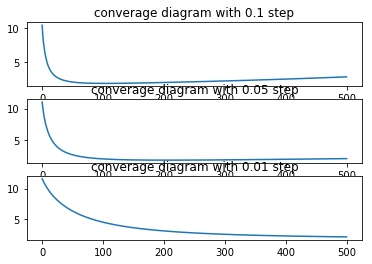

In [277]:
"""draw line diagram to view the converage condition for gradient_descent_version2"""
x = range(500)
plt.subplot(3,1,1)
plt.plot(range(500),gradient_descent_version2(X,y,0.1)[1])
plt.title("converage diagram with 0.1 step")

plt.subplot(3,1,2)
plt.plot(range(500),gradient_descent_version2(X,y,0.05)[1])
plt.title("converage diagram with 0.05 step")

plt.subplot(3,1,3)
plt.plot(range(500),gradient_descent_version2(X,y,0.01)[1])
plt.title("converage diagram with 0.01 step")

plt.show()

In [288]:
'''
use the own logistic regression function to complete the homework
'''
X_train, X_test, y_train, y_test = model_selection.train_test_split(m[:,1:3], y_label,test_size=0.5, random_state=42)

def prob_select_true(beta,x):
    print np.e**(np.dot(beta,x))
    return 1 - 1 / (1 + np.e**(np.dot(beta,x)))


beta = gradient_descent(X_train, y_train, 0.1)[0]    #get the optimized sequence

y_pred = []

for i in range(len(y_test)):
    y_pred.append(prob_select_true(beta,X_test[i,]))
    
print "y_test: ", y_test, " y_pred:" ,y_pred    #print the pro_y by the X_test to compare with y_test

2.76953419512
1.79955262728
1.60347272539
0.581473002551
0.987732994081
2.88670747429
0.649089572923
1.01016379169
1.35509081156
y_test:  [1 1 1 0 0 0 0 0 1]  y_pred: [0.7347152331729239, 0.6428000708917684, 0.6158976469209585, 0.36767810870828854, 0.4969143225081142, 0.7427128214264584, 0.39360480084320604, 0.5025281003798534, 0.5753879234324673]
